In [47]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

from scipy.signal import welch, csd
from numpy.random import rand

In [8]:
class ADC:
    def __init__(self, interval, bits):
        '''
        interval: tuple or list
                sequence of (min, max) pair of the reference voltage
        '''
        if type(bits) is not int:
            raise TypeError("bits must be integer.")
        if bits <= 0:
            raise ValueError("bits must be greater than zero.")
        min_input, max_input = interval
        self.interval = interval
        self.bits = bits
        self.LSB = abs(max_input - min_input)/2**bits
        
    def quantize(self, analog_input_signal):
        min_input, max_input = self.interval
        if (analog_input_signal < min_input).any() + (analog_input_signal > max_input).any():
            raise Exception("analog_input_signal outside the analog input interval of ADC.")
        LSB = self.LSB
        normalized_input_signal = (analog_input_signal - min_input)/LSB
#         normalized_bins = np.arange(2**self.bits) + 0.5
        quan_signal = np.round(normalized_input_signal)    
        quan_signal *= LSB
        quan_signal += min_input
        quan_noise = quan_signal - analog_input_signal
        return (quan_signal, quan_noise)

In [9]:
def white_noise_approx(LSB, length, width, seed):
    if seed!='':
        np.random.seed(seed)
    return LSB*(rand(length, width) - 0.5)

SNR = 2879.068
measured 0.00014567643366542827
theorectical 0.000146484375


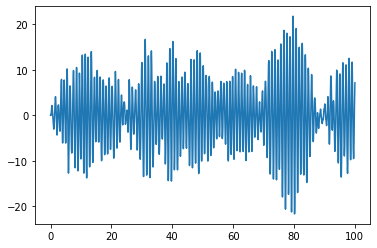

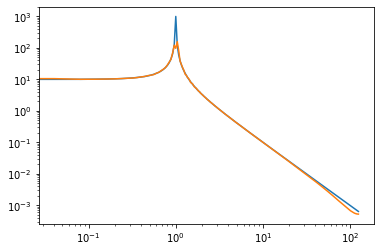

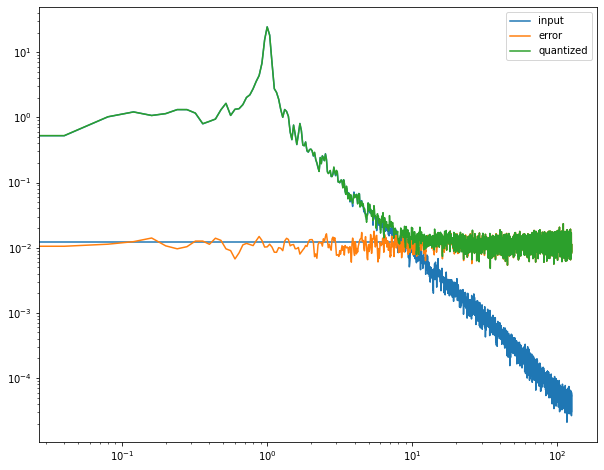

In [79]:
time = 100
fs = 250
length = int(time*fs)
t = np.linspace(0, time, length+1)
tf = 10*ct.tf([(2*np.pi)**2], [1, 0.01*2*np.pi, (2*np.pi)**2])
np.random.seed(5)
u=np.random.normal(0, 1, len(t))
_, signal, __ = ct.forced_response(sys=tf, T=t,U=u)

# np.random.seed(5)
# signal = 10*(rand(length) - 0.5)

interval = (-240, 240)
bits = 10
convertor = ADC(interval, bits)

quantized, quan_noise = convertor.quantize(signal)
SNR = np.sum(signal**2)/np.sum(quan_noise**2)
print("SNR = %.3f"%SNR)
num_of_average = 4
f, PSD0 = welch(quan_noise, fs=fs, nperseg=int(len(t)/num_of_average))
f1, PSD1 = welch(signal, fs=fs, nperseg=int(len(t)/num_of_average))
f2, PSD2 = welch(quantized, fs=fs, nperseg=int(len(t)/num_of_average))
f3, PSD3 = welch(u, fs=fs, nperseg=int(len(t)/num_of_average))
f4, CSD = csd(u, signal, fs=fs, nperseg=int(len(t)/num_of_average))
plt.figure()
plt.plot(t, signal)

plt.figure()
s = 2*np.pi*f4*1j
plt.loglog(f4, abs(tf(s)))
plt.loglog(f, abs(CSD/PSD3))

plt.figure(figsize=(10,8))
plt.loglog(f1, PSD1**0.5, label="input")
plt.loglog(f, PSD0**0.5, label="error")
plt.loglog(f2, PSD2**0.5, label="quantized")
plt.hlines( (convertor.LSB**2/6/fs)**0.5, min(f), max(f))
# plt.ylim(1e-6, 1e-1)
plt.legend()
print("measured", np.mean(PSD0[10:-10]))
print("theorectical", convertor.LSB**2/6/fs)

8.781596799294949

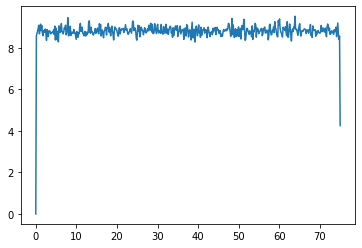

In [28]:
Amplitude=89
quan_noise_approx = white_noise_approx(Amplitude, length, 100, 0)
freq, PSD = welch(quan_noise_approx.T, fs, window='rect', nperseg=1024)

plt.plot(freq, np.mean(PSD, axis=0))
np.mean(PSD)

In [26]:
Amplitude**2/6/fs

8.801111111111112